In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [43]:

train_data = pd.read_csv("C:\\Users\\user\\Desktop\\data\\train.csv")

test_data = pd.read_csv("C:\\Users\\user\\Desktop\\data\\test.csv")

train_data.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
1,0.08447,0.0,4.05,0,0.510,5.859,68.7,2.7019,5,296,16.6,393.23,9.64,22.6
2,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,29.4
3,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11,23.2
4,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29,24.6
5,0.06642,0.0,4.05,0,0.510,6.860,74.4,2.9153,5,296,16.6,391.27,6.92,29.9
6,0.05780,0.0,2.46,0,0.488,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2


In [44]:
X = train_data.drop(columns=['MEDV']) 
y = train_data['MEDV']

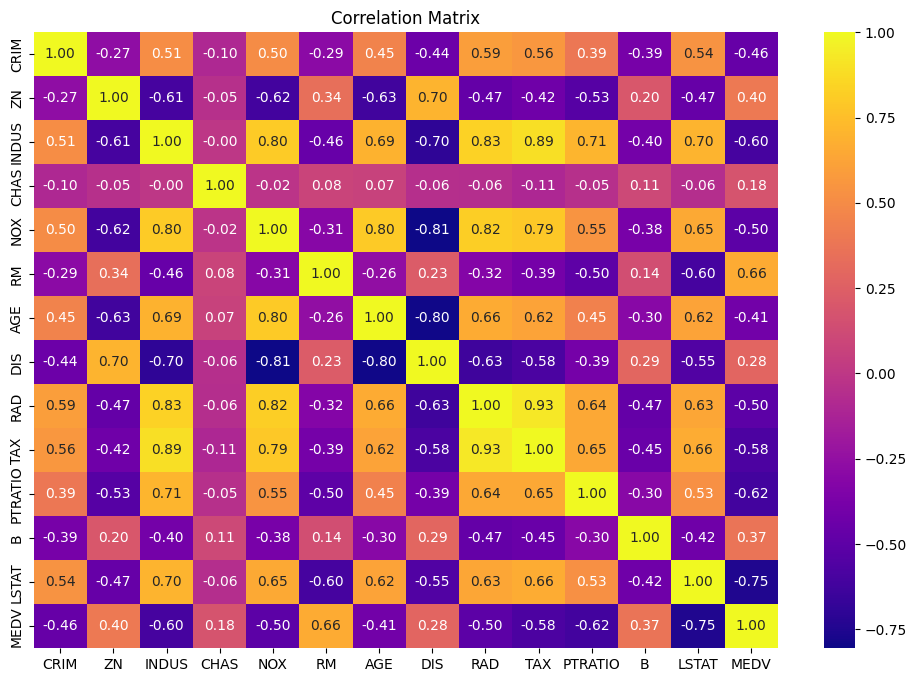

In [45]:
plt.figure(figsize=(12, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [46]:
X_test = test_data.drop(columns=['MEDV'])
X_test.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


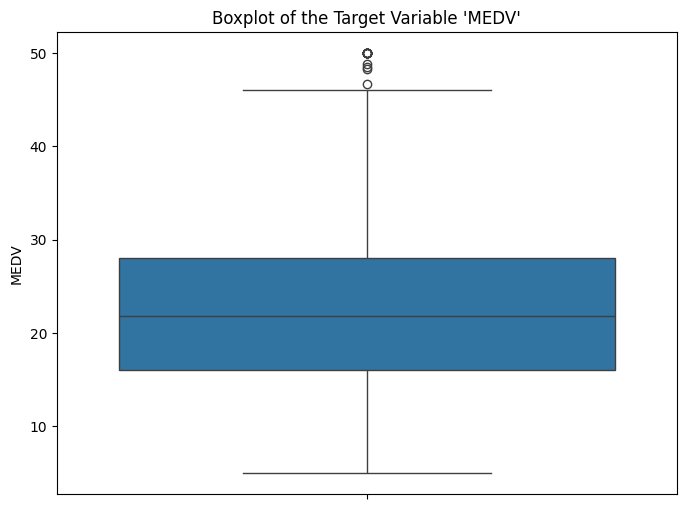

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(train_data['MEDV'])
plt.title("Boxplot of the Target Variable 'MEDV'")
plt.show()

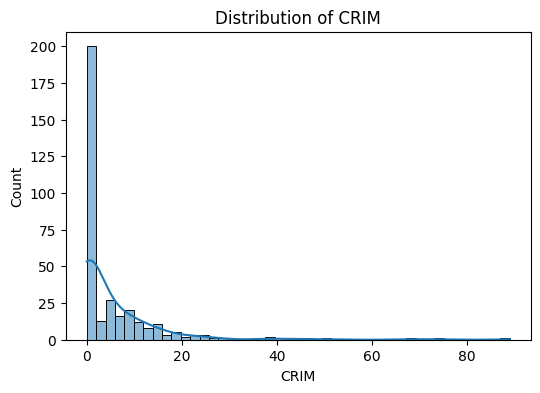

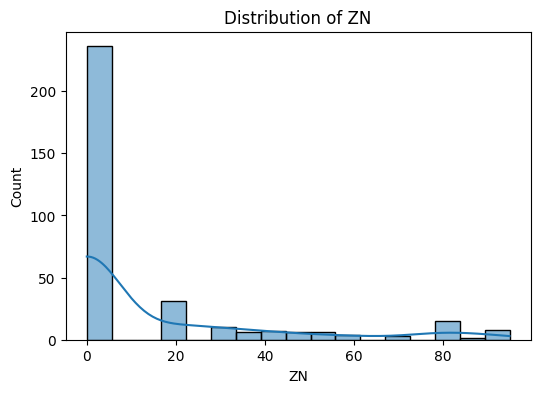

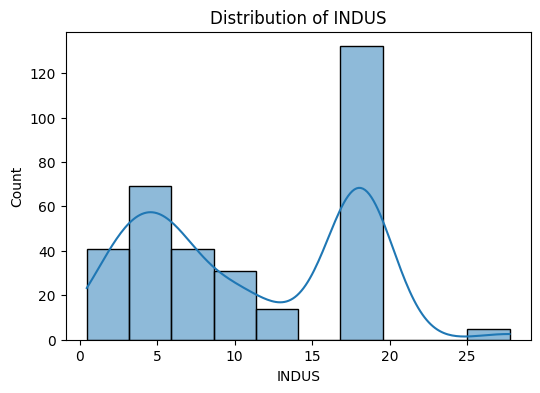

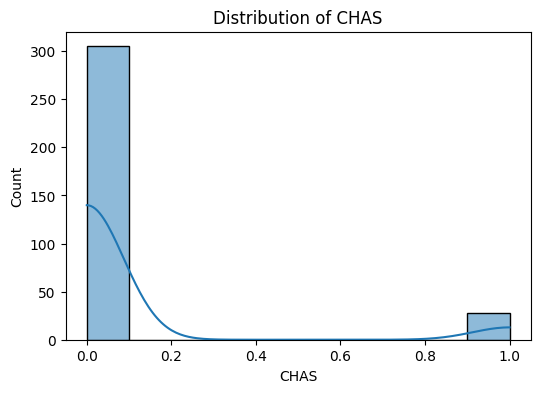

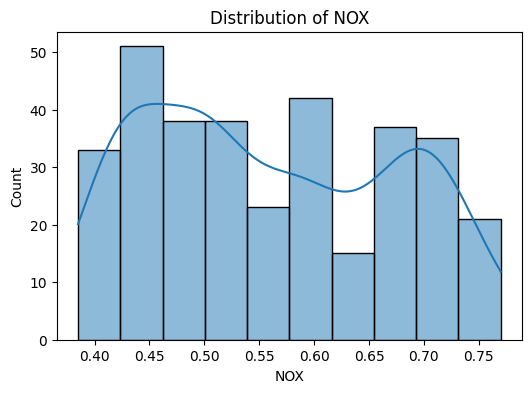

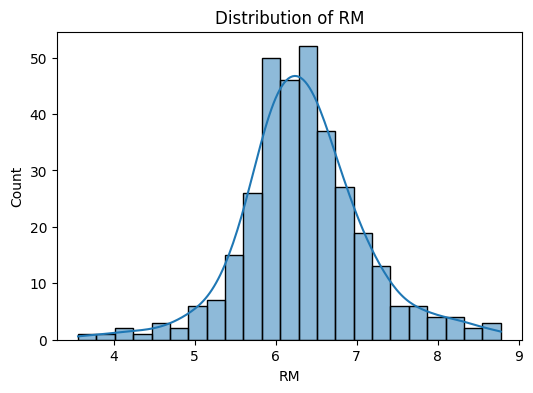

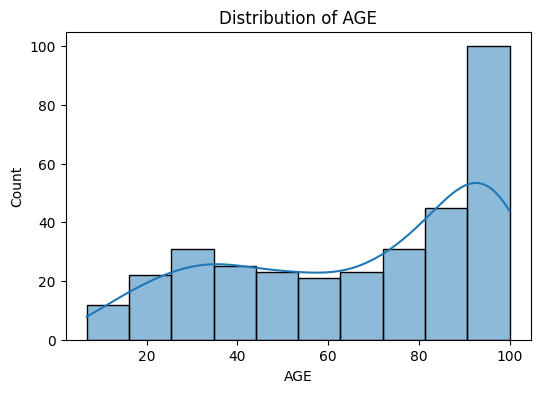

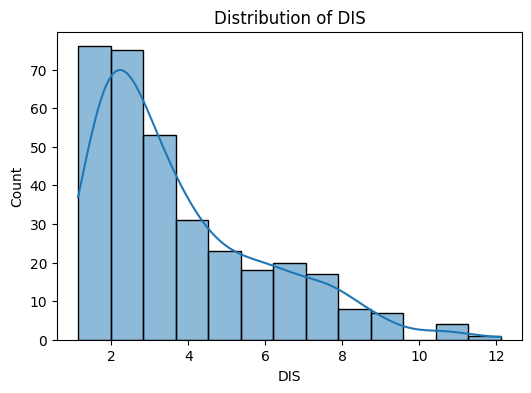

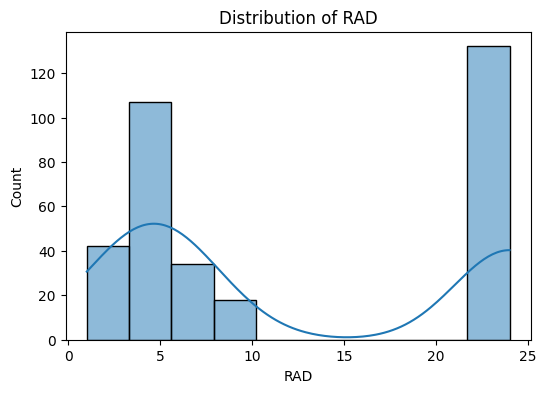

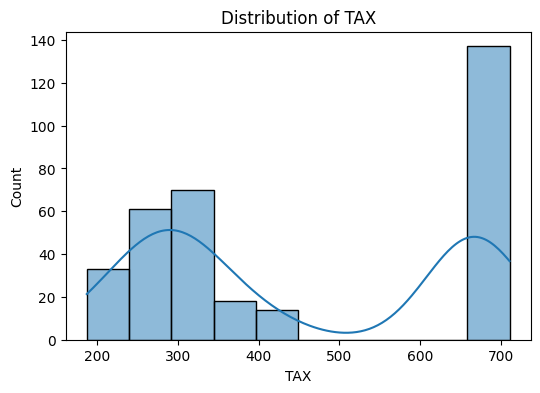

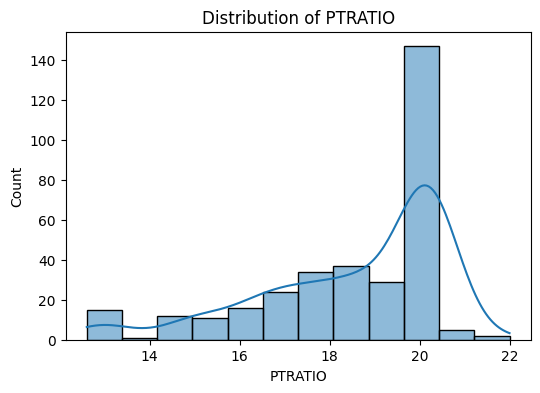

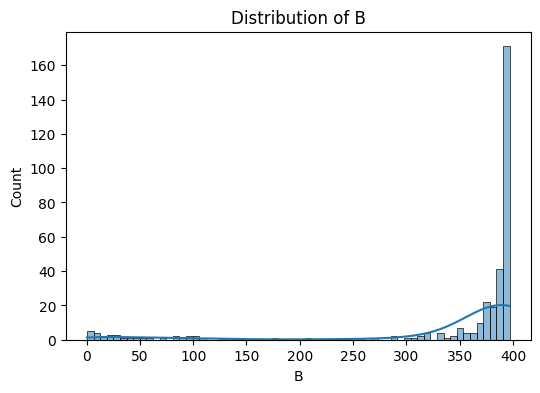

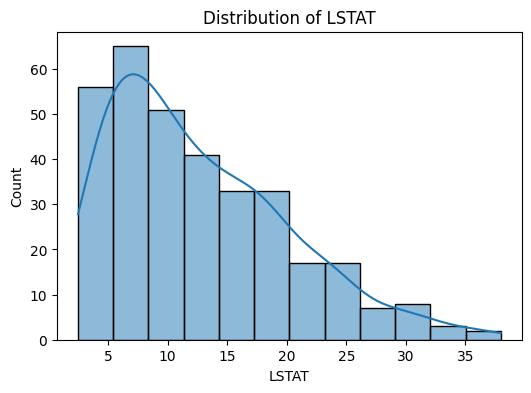

In [48]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [51]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=1)

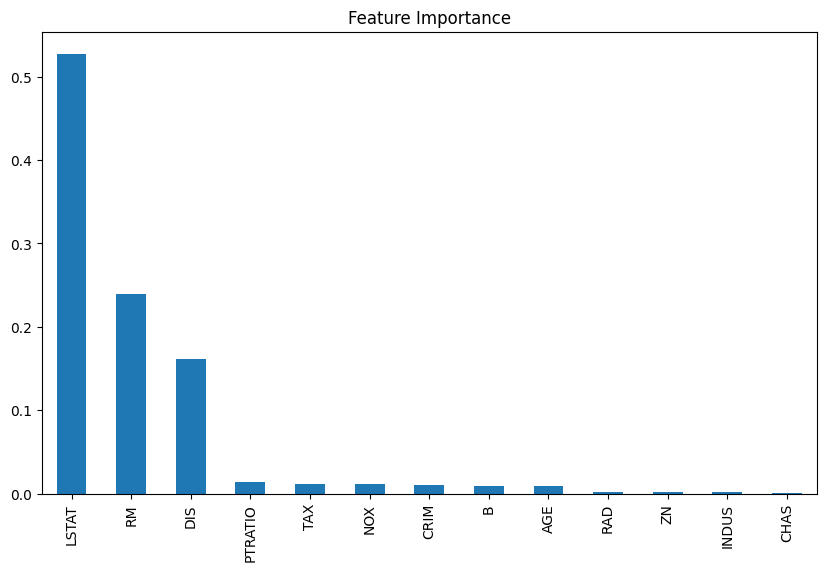

In [52]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title="Feature Importance")
plt.show()

In [53]:
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [54]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=1),
}

In [55]:
def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    return mse, r2

In [56]:
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    if name in ['Ridge Regression', 'Lasso Regression']:
        # For regularized models, use polynomial features
        mse, r2 = evaluate_model(model, X_train_poly, y_train, X_valid_poly, y_valid)
    else:
        mse, r2 = evaluate_model(model, X_train_scaled, y_train, X_valid_scaled, y_valid)
    
    print(f"{name} - MSE: {mse}, R2 Score: {r2}")

Evaluating Linear Regression...
Linear Regression - MSE: 33.40591448729488, R2 Score: 0.6721880210985962
Evaluating Ridge Regression...
Ridge Regression - MSE: 18.66957784792385, R2 Score: 0.8167955778636335
Evaluating Lasso Regression...
Lasso Regression - MSE: 27.47907610644267, R2 Score: 0.7303480400076695
Evaluating Random Forest...
Random Forest - MSE: 23.330381582089533, R2 Score: 0.7710591470903048


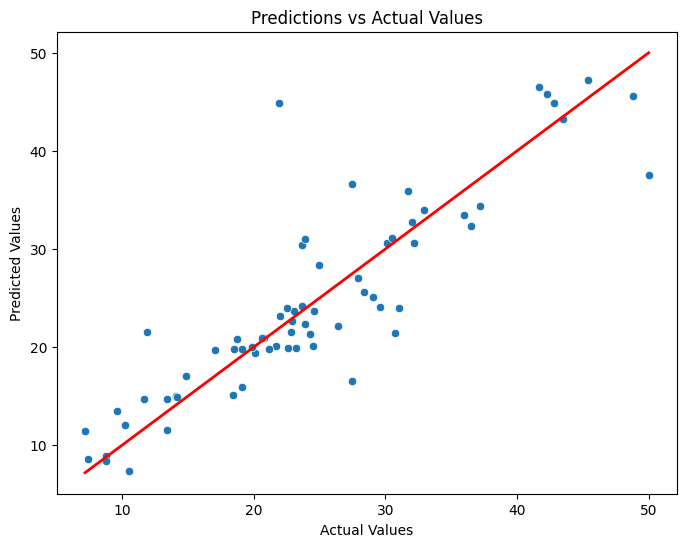

In [57]:
y_pred = model.predict(X_valid_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=y_pred)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', lw=2)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()